# Getting Started
## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import quandl

In [164]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
output_notebook()

Loading BokehJS ...

## Jupyter Settings

In [3]:
%matplotlib inline
# Control the default size of figures
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


C:\Users\sasa9\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show', 'figure', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Company Profiles
1. Apple Inc.
2. Microsoft Corp.
3. Raytheon Company
4. Electronic Arts Inc.
5. NVIDIA Corp.
6. Intel Corp.
7. Advanced Micro Devices, Inc.
8. Twitter Inc.
9. Google Inc.
10. Facebook Inc.
11. Yahoo! Inc.

## Getting Financial Data

```
start = "1970-01-01"
end = datetime.utcnow().strftime('%Y-%m-%d')

# Apple Inc.
aapl = quandl.get("WIKI/AAPL", start_date=start, end_date=end)

# Microsoft Corp.
msft = quandl.get("WIKI/MSFT", start_date=start, end_date=end)

# Raytheon Company
rtn = quandl.get("WIKI/RTN", start_date=start, end_date=end)

# Electronic Arts Inc.
ea = quandl.get("WIKI/EA", start_date=start, end_date=end)

# NVIDIA Corp.
nvda = quandl.get("WIKI/NVDA", start_date=start, end_date=end)

# Intel Corp.
intc = quandl.get("WIKI/INTC", start_date=start, end_date=end)

# Advanced Micro Devices, Inc.
amd = quandl.get("WIKI/AMD", start_date=start, end_date=end)

# Twitter Inc.
twtr = quandl.get("WIKI/TWTR", start_date=start, end_date=end)

# Google Inc.
goog = quandl.get("WIKI/GOOG", start_date=start, end_date=end)

# Facebook Inc.
fb = quandl.get("WIKI/FB", start_date=start, end_date=end)

# Yahoo! Inc.
yhoo = quandl.get("WIKI/YHOO", start_date=start, end_date=end)
```

## Saving to `.csv` files

```
aapl.to_csv("AAPL.csv")
msft.to_csv("MSFT.csv")
rtn.to_csv("RTN.csv")
ea.to_csv("EA.csv")
nvda.to_csv("NVDA.csv")
intc.to_csv("INTC.csv")
amd.to_csv("AMD.csv")
twtr.to_csv("TWTR.csv")
goog.to_csv("GOOG.csv")
fb.to_csv("FB.csv")
yhoo.to_csv("YHOO.csv")
```

# Apple

## Importing `.csv`

In [18]:
aapl = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

## Descriptive Statistics

In [6]:
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07,0.003633,1.000957,21.571019,21.774929,21.351252,21.567664,8.860156e+07
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07,0.088269,0.064409,39.272529,39.584888,38.942651,39.271266,8.704777e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,0.161731,2.503760e+05
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06,0.000000,1.000000,0.923453,0.940280,0.904096,0.922730,3.461080e+07
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06,0.000000,1.000000,1.437461,1.468272,1.410762,1.437445,6.069700e+07
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07,0.000000,1.000000,20.270182,20.565604,19.905845,20.294924,1.109031e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,182.590000,183.500000,180.210000,181.720000,1.855410e+09


## Data Preprocessing

In [100]:
def preprocessing(df):
    # Forward and Backward filling missing values
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

In [101]:
preprocessing(aapl)

In [96]:
def plot_prices(df, x='Date', y='Adj. Close', title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningfu-l axis labels."""
    source = ColumnDataSource(df)
    # create a new plot with a title and axis labels
    p = figure(title=title,
               x_axis_label=xlabel,
               y_axis_label=ylabel,
               x_axis_type='datetime',
               plot_height=500,
               plot_width=950,
               tools=['pan','wheel_zoom'],
               toolbar_location='below')
   
    # configure so that Bokeh chooses what (if any) scroll tool is active
    p.toolbar.active_scroll = "auto"
    
    # add a line renderer with legend and line thickness
    p.line(x=x, y=y, line_width=2, legend='Adj Close', source=source)
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    hover = HoverTool(
        tooltips=[
            ( 'Date',   '@Date{%F}'            ),
            ( 'Close',  '$@{Adj. Close}{%0.2f}' ), # use @{ } for field names with spaces
            ( 'Volume', '@Volume{0.00 a}'      ),
        ],

        formatters={
            'Date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'Adj. Close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
        mode='vline'
    )
    p.add_tools(hover)
    # show the results
    show(p, notebook_handle=True)
    push_notebook()

In [98]:
plot_prices(aapl, title="AAPL Stock prices")

## Daily Return
- Return Equation: $$return_t = \dfrac{{p_t}}{p_{t-1}} - 1$$
- Log Return Equation: $$change_t = log( price_t ) − log( price_{t−1} )$$
- Growth Equation: $$growth_t = \dfrac{( price_{t−1} − price_t )}{price_t}$$

In [159]:
def daily_return(series):
    # Daily log returns
    daily_log_returns = np.log(series / series.shift(1))
    return daily_log_returns

In [126]:
def plot_return(df, returnFunc, x='Date', y='Adj. Close', title="Return prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningfu-l axis labels."""    
    stock_return = returnFunc(df[y])
    
    # create a new plot with a title and axis labels
    p = figure(title=title,
               x_axis_label=xlabel,
               y_axis_label=ylabel,
               x_axis_type='datetime',
               plot_height=500,
               plot_width=950,
               tools=['pan','wheel_zoom'],
               toolbar_location='below')
    
    # configure so that Bokeh chooses what (if any) scroll tool is active
    p.toolbar.active_scroll = "auto"
    # add a line renderer with legend and line thickness
    p.line(stock_return.index, stock_return, line_width=2, legend='Return')
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    
    # show the results
    show(p, notebook_handle=True)
    push_notebook()

In [140]:
plot_return(aapl, daily_return, title="AAPL Daily Return prices")

## Monthly & Quarter Return

In [160]:
def monthly_return(series):
    # Resample `stock` to business months, take last observation as value 
    monthly = series.resample('BM').apply(lambda x: x[-1])

    # Calculate the monthly percentage change
    monthly.pct_change()
    return monthly

def quarter_return(series):
    # Resample `stock` to quarters, take the mean as value per quarter
    quarter = series.resample("4M").mean()

    # Calculate the quarterly percentage change
    quarter.pct_change()
    return quarter

In [150]:
plot_return(aapl, monthly_return, title="AAPL Monthly Return prices")

In [136]:
plot_return(aapl, quarter_return, title="AAPL Monthly Return prices")

## Cumulative daily return

In [141]:
def cum_return(series):
    daily_pct_change = daily_return(series)
    cum_daily_return = (1 + daily_pct_change).cumprod()
    return cum_daily_return

In [142]:
plot_return(aapl, cum_return, title="AAPL Monthly Return prices")

## Monthly & Quarter Cumulative Return

In [151]:
def monthly_cum_return(series):
    cum_daily_return = cum_return(series)
    # Resample the cumulative daily return to cumulative monthly return 
    cum_monthly_return = cum_daily_return.resample("M").mean()
    return cum_monthly_return

In [153]:
plot_return(aapl, monthly_cum_return, title="AAPL Monthly Return prices")

## Daily Return Prices Distribution

In [238]:
def plot_return_dist(df, returnFunc, title='Daily Return Prices Distribution'):    
    # Calculate the daily percentage change for `daily_close_px`
    pct_change = returnFunc(df['Adj. Close'])
    #pct_change = close_px.pct_change()
    
    # Plot the distributions
    ax = pct_change.hist(bins=50, figsize=(12,8), align='mid')
    ax.set_title(title)
    #ax.set_xlim(-0.3,0.3)
    # Show the resulting plot
    plt.show()

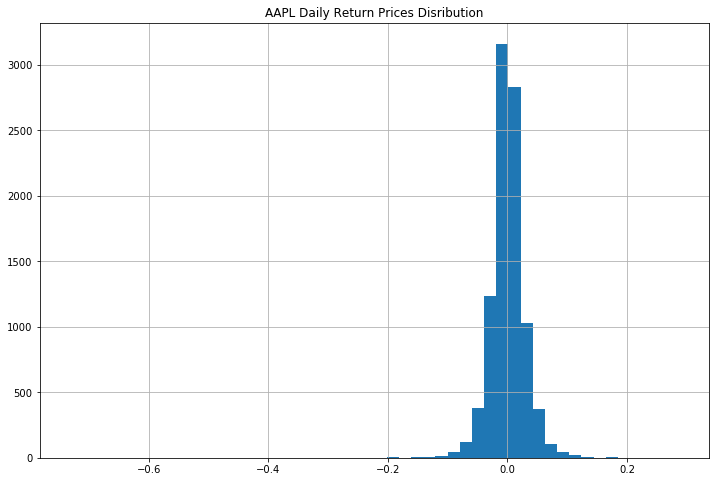

In [237]:
plot_return_dist(aapl, daily_return, title='AAPL Daily Return Prices Disribution')

## Monthly and Quarter Return Distribution

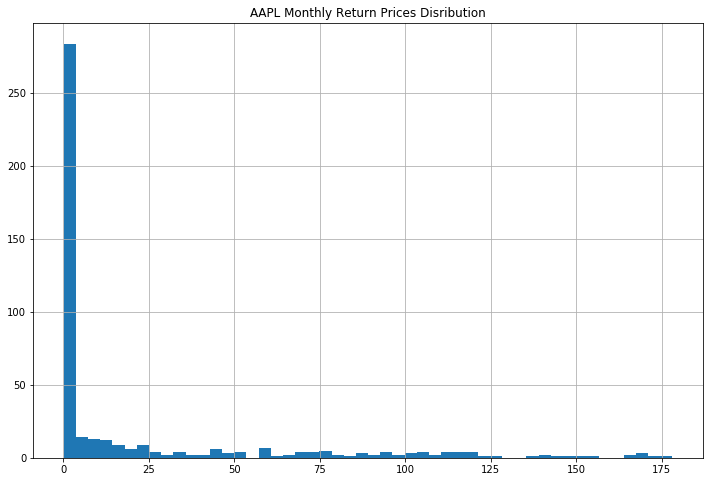

In [239]:
plot_return_dist(aapl, monthly_return, title='AAPL Monthly Return Prices Disribution')

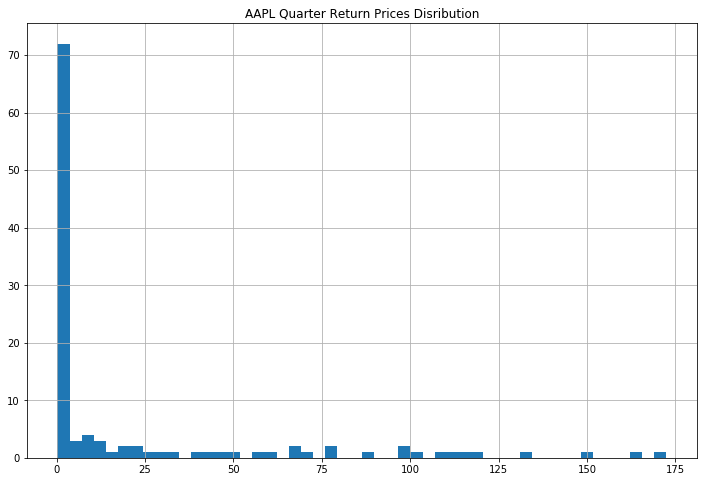

In [240]:
plot_return_dist(aapl, quarter_return, title='AAPL Quarter Return Prices Disribution')

## Volatility of Daily Returns 

In [279]:
def calc_volatility(df, returnFunc, min_periods, xlabel='Date', ylabel='Volatility', title='AAPL Volatility of Daily Returns'):
    pct_change = returnFunc(df['Adj. Close'])
    # Define the minumum of periods to consider 
    
    # create a new plot with a title and axis labels
    p = figure(title=title,
               x_axis_label=xlabel,
               y_axis_label=ylabel,
               x_axis_type='datetime',
               plot_height=500,
               plot_width=950,
               tools=['pan','wheel_zoom'],
               toolbar_location='below')
    
    # configure so that Bokeh chooses what (if any) scroll tool is active
    p.toolbar.active_scroll = "auto"
    
    # Calculate the volatility
    vol = pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
    
    # add a line renderer with legend and line thickness
    p.line(vol.index, vol, line_width=2, legend='Volatility')
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    
    # show the results
    show(p, notebook_handle=True)
    push_notebook()

In [280]:
calc_volatility(aapl, daily_return, 75)